<a href="https://colab.research.google.com/github/Muyiiwaa/deep-learning-from-here/blob/master/Neural_network_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# importing the required libraries

import numpy as np
import math

import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
# load the handwritten digits dataset

(X_train, y_train), (X_test,y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
# Explore the image dataset

X_train.shape

(60000, 28, 28)

In [7]:
X_train[0].shape

(28, 28)

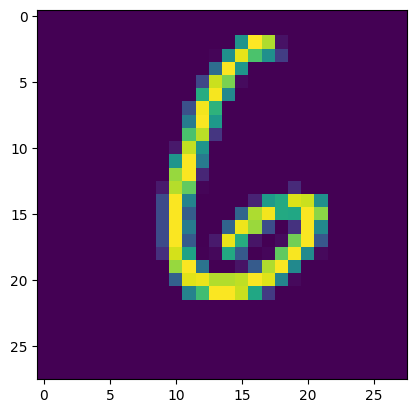

In [20]:
# visualising the image

plt.imshow(X_train[32])


In [19]:
y_train[32]

6

In [26]:
# flattening the array

X_train_flat = X_train.reshape(len(X_train), (28 * 28))

X_train_flat.shape

(60000, 784)

In [29]:
X_train_flat[0].shape

(784,)

In [31]:
# train the first instance neural network with an input and output layer

model = keras.Sequential([
    keras.layers.Dense(10, input_shape = (784,), activation = 'sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(X_train_flat, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 9.7756 - accuracy: 0.8390
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 6.0691 - accuracy: 0.8783
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 5.6308 - accuracy: 0.8834
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 5.5446 - accuracy: 0.8847
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 5.4405 - accuracy: 0.8850


In [42]:
# making the neural net better.

# normalizing the training data
print(max(X_train_flat[0]))
X_train_norm = X_train_flat/255

model = keras.Sequential([
    keras.layers.Dense(10, input_shape = (784,), activation = 'sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(X_train_norm, y_train, epochs = 5)

255
Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4708 - accuracy: 0.8756
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3039 - accuracy: 0.9153
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2834 - accuracy: 0.9211
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2734 - accuracy: 0.9237
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2661 - accuracy: 0.9257


In [43]:
# evaluating the model on the test set

X_test_flat = X_test.reshape(len(X_test), 28*28)

model.evaluate(X_test_flat, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 47.6282 - accuracy: 0.9108


[47.62823486328125, 0.9107999801635742]

In [ ]:
predictions = model.predict(X_test_flat)


In [46]:
len(predictions[0])


10

In [52]:
# visualising all the probabilities of the outcome
for _ in predictions[3]:
  print(_)

1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


In [54]:
# converting individual predictions to an actual digit
np.argmax(predictions[3])

0

Text(50.722222222222214, 0.5, 'Predicted Value')

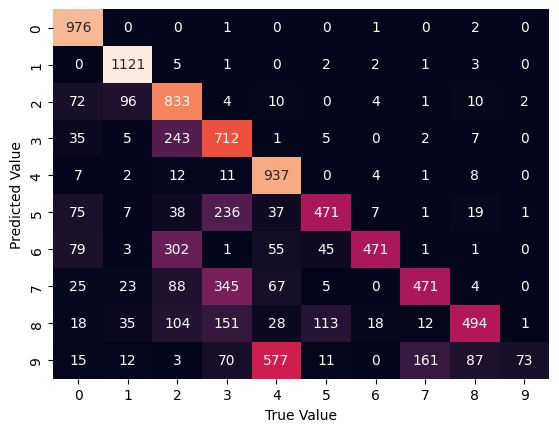

In [65]:
# Evaluate the model

preds = [np.argmax(x) for x in predictions]

confusion = tf.math.confusion_matrix(labels= y_test, predictions=preds)

sns.heatmap(confusion, annot = True, cbar = False, fmt = '0.0f')
plt.xlabel('True Value')
plt.ylabel('Predicted Value')

In [ ]:
predictions.shape

In [ ]:
y_test.shape

In [59]:
predictions[0]

array([0., 0., 0., 1., 0., 0., 0., 1., 0., 1.], dtype=float32)

### Strategy on Improvement

1. Try other normalization technique
2. Try other loss, optimizer and activation function
3. Add more layers to the neural network